<a href="https://colab.research.google.com/github/khalilullahalfaath/Project_Based_ML/blob/main/ML_Project_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama kelompok:
*   Naufal Abdurrahman Burhani
*   Hilman Taris Muttaqin
*   Muhammad Erlangga Arsadi
*   Khalilullah Al Faath





==========================================================

NIM terkecil: 1301204008

1301204008 % 4 = 0

Ketentuan tubes:

Tugas tipe 0: Bagging dengan regresi (dataset: autos MPG)


==========================================================



# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# library untuk preprocessing
# Untuk data imputation
from sklearn.impute import SimpleImputer 

# Import dataset

In [ ]:
df = pd.read_csv("https://github.com/khalilullahalfaath/Project_Based_ML/blob/fa1ad703e8ad687e46747bbfbd8e5cef6270aa11/autos_mpg.csv?raw=true")

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Attribute information
1.	mpg: continuous (target attribute)
2.	cylinders: multi-valued discrete
3.	displacement: continuous
4.	horsepower: continuous
5.	weight: continuous
6.	acceleration: continuous
7.	model year: multi-valued discrete
8.	origin: multi-valued discrete
9.	car name: string (unique for each instance)


Proses Data Science:



*   Data Preparation
*   Data Cleansing
*   Exploratory Data Analysis
*   Feature Engineering
*   Modeling
*   Evaluation
*   Deployment












# Data Preparation

1. DATA COLLECTION
2. DATA DISCOVERY AND PROFILING
3. DATA CLEANSING
4. DATA FORMATTING
5. DATA COMBINING AND ANALYZING
6. DATA VALIDATION AND PUBLISHING


## Dimensi dataset

In [ ]:
N, K = df.shape
print("Jumlah baris = ",N)
print("Jumlah kolom = ",K)

Jumlah baris =  398
Jumlah kolom =  9


## Lima data terawal

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Lima data terakhir

In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## Lima data random

In [ ]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
303,31.8,4,85.0,65,2020,19.2,79,3,datsun 210
172,25.0,4,90.0,71,2223,16.5,75,2,volkswagen dasher
90,12.0,8,429.0,198,4952,11.5,73,1,mercury marquis brougham
320,37.0,4,119.0,92,2434,15.0,80,3,datsun 510 hatchback


## Deskripsi terkait dataset

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Tipe setiap kolom dari dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Dapat dilihat bahwa dalam kolom 'horsepower' yang seharusnya numerik, malah bertipe object. Menandakan bahwa ada data yang null dengan '?'



## Memeriksa data null

In [ ]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [ ]:
df.columns[df.isin(['?']).any()]

Index(['horsepower'], dtype='object')

In [ ]:
df.replace("?",np.nan,inplace=True)

In [ ]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


data NULL ada di kolom horsepower

### Menentukan angka skewness dari data

Menurut sumber https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/,
1.   Mean-It is preferred if data is numeric and not skewed.
2.   Median-It is preferred if data is numeric and skewed.
3.   Mode-It is preferred if the data is a string(object) or numeric.

In [ ]:
temp_df = df['horsepower'].copy().dropna().astype(int).to_numpy()

In [ ]:
temp_df

array([130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150,
       225,  95,  95,  97,  85,  88,  46,  87,  90,  95, 113,  90, 215,
       200, 210, 193,  88,  90,  95, 100, 105, 100,  88, 100, 165, 175,
       153, 150, 180, 170, 175, 110,  72, 100,  88,  86,  90,  70,  76,
        65,  69,  60,  70,  95,  80,  54,  90,  86, 165, 175, 150, 153,
       150, 208, 155, 160, 190,  97, 150, 130, 140, 150, 112,  76,  87,
        69,  86,  92,  97,  80,  88, 175, 150, 145, 137, 150, 198, 150,
       158, 150, 215, 225, 175, 105, 100, 100,  88,  95,  46, 150, 167,
       170, 180, 100,  88,  72,  94,  90,  85, 107,  90, 145, 230,  49,
        75,  91, 112, 150, 110, 122, 180,  95, 100, 100,  67,  80,  65,
        75, 100, 110, 105, 140, 150, 150, 140, 150,  83,  67,  78,  52,
        61,  75,  75,  75,  97,  93,  67,  95, 105,  72,  72, 170, 145,
       150, 148, 110, 105, 110,  95, 110, 110, 129,  75,  83, 100,  78,
        96,  71,  97,  97,  70,  90,  95,  88,  98, 115,  53,  8

In [ ]:
print(skew(temp_df))

1.0831611646869432


dapat dilihat bahwa colomn horsepower sangat condong ke arah kanan sehingga bagusnya menggunakan imputer dengan strategi median

## Handling data NULL

In [ ]:
col_num = ['horsepower']

In [ ]:
df = df.astype({'horsepower': 'float'})

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [ ]:
df[col_num]

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [ ]:
imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputer.fit(df[col_num])
df[col_num] = imputer.transform(df[col_num])

In [ ]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


data NULL sudah berhasil dihilangkan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## Mengecek duplikasi data

In [ ]:
bool_series = df.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool


In [ ]:
print(type(bool_series))
bool_series.value_counts()

<class 'pandas.core.series.Series'>


False    398
dtype: int64

Tidak terdeteksi adanya duplikasi data

## Mengecek apakah data memiki variansi yang sedikit

In [ ]:
df.var()

<ipython-input-28-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

kolom dengan variansi yang mendekati nilai 0 menandakan bahwa datanya tidak memiliki data yang tersebar atau cenderung memiliki value yang sama

In [ ]:
col1len = []
for col in df:
    if (len(df[col].unique()) == 1):
      col1len.append(col)
print(col1len)

[]


In [ ]:
df['origin'].unique()

array([1, 3, 2])

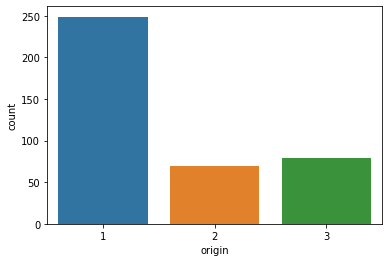

In [ ]:
sns.countplot(x=df["origin"])

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
